In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
## load datasets

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
california=fetch_california_housing()

In [5]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [6]:
## check the description 
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [7]:
print(california.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [8]:
print(california.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [9]:
dataset=pd.DataFrame(california.data,columns=california.feature_names)

In [10]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
dataset['price']=california.target

In [12]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [14]:
## summerizing stats
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [15]:
## check the missing values
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [16]:
## exploratory data analysis
## correlation
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [17]:
import seaborn as sns
sns.pairplot(dataset)


ModuleNotFoundError: No module named 'seaborn'

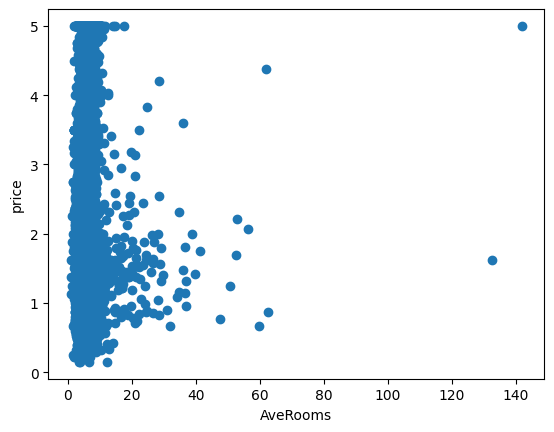

In [18]:
plt.scatter(dataset['AveRooms'],dataset['price'])

plt.xlabel("AveRooms")
plt.ylabel("price")
plt.show() 

In [19]:
import seaborn as sns
sns.regplot(x="AveRooms",y="price",data=dataset)
plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [20]:
sns.regplot(x="Population",y="price",data=dataset)
plt.show()

NameError: name 'sns' is not defined

In [21]:
sns.regplot(x="MedInc",y="price",data=dataset)
plt.show()

NameError: name 'sns' is not defined

In [22]:
## dependant and independant features

X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [23]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [24]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: price, Length: 20640, dtype: float64

In [25]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,)

In [26]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
9345,4.6250,49.0,5.478927,1.057471,1178.0,2.256705,37.98,-122.57
8296,4.3889,52.0,4.290064,1.028846,1144.0,1.833333,33.76,-118.14
13365,2.7284,26.0,6.004902,0.975490,717.0,3.514706,33.98,-117.60
11888,2.5804,34.0,5.390029,1.021994,2653.0,3.890029,33.97,-117.37
15211,4.6028,18.0,6.316306,1.155206,1618.0,3.178782,32.99,-117.09
...,...,...,...,...,...,...,...,...
10386,5.8260,14.0,6.235995,0.965435,3041.0,3.624553,33.61,-117.64
9707,2.8924,52.0,5.355353,1.045558,1169.0,2.662870,36.67,-121.65
18490,5.6754,5.0,6.682702,1.033777,3071.0,3.143296,37.03,-121.61
11897,7.2519,33.0,7.526515,1.037879,1398.0,2.647727,33.96,-117.37


In [27]:
## standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [28]:
X_train=scaler.fit_transform(X_train)

In [29]:
X_test=scaler.transform(X_test)

In [30]:
import pickle 
pickle.dump(scaler,open('scaling,pkl','wb'))

In [31]:
X_train

array([[ 0.39419836,  1.6184275 ,  0.02527365, ..., -0.07111731,
         1.10461567, -1.49631971],
       [ 0.27056041,  1.85612686, -0.47906591, ..., -0.10788288,
        -0.87677447,  0.71261634],
       [-0.59898989, -0.20393425,  0.24840269, ...,  0.03812742,
        -0.77347925,  0.98187717],
       ...,
       [ 0.94425897, -1.86782976,  0.53593912, ...,  0.00587419,
         0.65856813, -1.0176338 ],
       [ 1.76982118,  0.35069759,  0.89390151, ..., -0.03716095,
        -0.78286972,  1.09656233],
       [-0.74168935,  0.82609631, -0.23071141, ..., -0.03691128,
         1.68212986, -1.21708626]], shape=(14448, 8))

In [32]:
X_test

array([[ 0.59057377,  0.42993071,  0.2991672 , ...,  0.00815412,
        -0.83451733,  0.60790379],
       [ 0.50055528, -1.39243104,  0.04507593, ..., -0.02272044,
        -0.75000306,  0.96193192],
       [-1.29834817,  0.35069759, -0.74742986, ...,  0.02413623,
         0.52710148, -0.13007033],
       ...,
       [-1.0577752 ,  1.53919438, -0.39895668, ..., -0.10971495,
         1.11870138, -1.276922  ],
       [-1.02892111,  0.66763007, -0.56026243, ...,  0.14300421,
        -0.75939354,  0.6527806 ],
       [-0.86967375, -0.67933297,  0.99639341, ..., -0.03601968,
         2.46623449, -1.97500563]], shape=(6192, 8))

## Training model 

In [33]:
## Training model 
from sklearn.linear_model import LinearRegression

In [34]:
regression=LinearRegression()

In [35]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
## print coefficient and intercept
print(regression.coef_)

[ 0.8546993   0.12411367 -0.3022226   0.33853611 -0.00104606 -0.04642756
 -0.89385637 -0.86685834]


In [37]:
print(regression.intercept_)

2.067981790559248


In [38]:
## on which parameter the model has been trained
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'positive': False,
 'tol': 1e-06}

In [39]:
## prediction with test data
reg_pred=regression.predict(X_test)

In [40]:
reg_pred

array([2.68475709, 2.09569344, 0.80227053, ..., 1.54660635, 1.56485358,
       0.96873296], shape=(6192,))

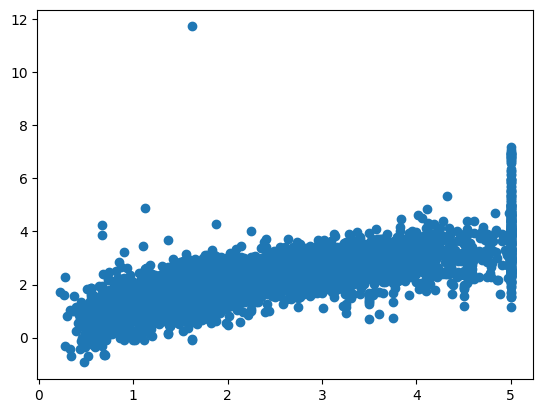

In [41]:
## plot a scatter plot for prediction
plt.scatter(y_test,reg_pred)
plt.show()

In [42]:
## Residuals
residuals=y_test-reg_pred

In [43]:
residuals

8709     0.857243
13346   -0.725693
2076    -0.246271
20602    0.243591
17131    0.527313
           ...   
15975    0.097229
10987    0.051645
1366    -0.098606
4906    -0.568854
19790   -0.218733
Name: price, Length: 6192, dtype: float64

In [44]:
## Plot the Residuals
sns.displot(residuals,kind='kde')
plt.show()

NameError: name 'sns' is not defined

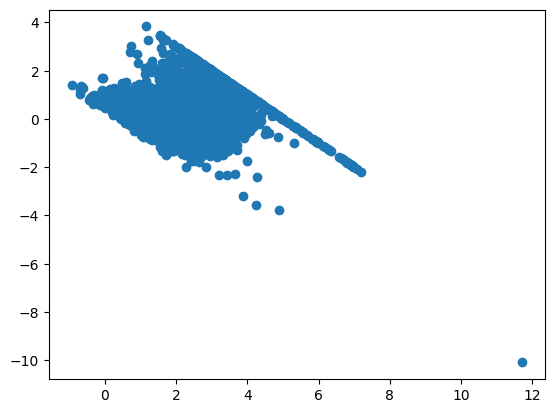

In [45]:
## scatter  plot with respect to prediction and residual
## uniform distribution
plt.scatter(reg_pred,residuals)
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [47]:
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))

0.5325010554385955
0.5303078617620355


## R square and Adjusted R square

##r^2

In [48]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.5951276289827002


In [49]:
##Adjusted r^2

## New Data Predicttion

In [50]:
california.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [51]:
## transformation of new data
scaler.transform(california.data[0].reshape(1,-1))

d:\ML project\California house pricing\CaliforniaHousePricing\venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.33187377,  0.98456255,  0.66380958, -0.16638807, -0.94976133,
        -0.04516514,  1.0576633 , -1.32678512]])

In [52]:
regression.predict(scaler.transform(california.data[0].reshape(1,-1)))

d:\ML project\California house pricing\CaliforniaHousePricing\venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.13410979])

## Pickling the model file for Deployment

In [53]:
import pickle

In [54]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [55]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [56]:
## Prediction
pickled_model.predict(scaler.transform(california.data[0].reshape(1,-1)))

d:\ML project\California house pricing\CaliforniaHousePricing\venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.13410979])